<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [6]:
#Add necessary imports and functions to read the data
import pandas as pd
import numpy as np
df = pd.read_csv('yellow_tripdata_2016-01.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,40.767509,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40,-73.994240,40.766586,1,N,-73.984428,40.753922,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
10906856,1,2016-01-05 06:21:44,2016-03-28 12:54:26,1,2.10,-73.948067,40.776531,1,N,-73.978188,40.777435,1,11.5,0.0,0.5,2.45,0.00,0.3,14.75


<h2>Remove data outside the bounding box</h2>


In [7]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[df['pickup_latitude']<=northlimit]
df = df[df['pickup_latitude']>=southlimit]
df = df[df['pickup_longitude']>=westlimit]
df = df[df['pickup_longitude']<=eastlimit]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,40.767509,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40,-73.994240,40.766586,1,N,-73.984428,40.753922,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
10906856,1,2016-01-05 06:21:44,2016-03-28 12:54:26,1,2.10,-73.948067,40.776531,1,N,-73.978188,40.777435,1,11.5,0.0,0.5,2.45,0.00,0.3,14.75


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [8]:
import datetime
dropoff = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
pickup = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['duration'] = dropoff - pickup
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80,0 days 00:00:00
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30,0 days 00:00:00
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30,0 days 00:00:00
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30,0 days 00:00:00
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,40.767509,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80,0 days 00:07:46
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,0 days 00:00:11
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40,-73.994240,40.766586,1,N,-73.984428,40.753922,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80,74 days 14:33:04
10906856,1,2016-01-05 06:21:44,2016-03-28 12:54:26,1,2.10,-73.948067,40.776531,1,N,-73.978188,40.777435,1,11.5,0.0,0.5,2.45,0.00,0.3,14.75,83 days 06:32:42


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [13]:
df['duration'] = df['duration']/datetime.timedelta(seconds=1)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80,0.0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30,0.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30,0.0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,40.767509,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80,466.0
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,11.0
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40,-73.994240,40.766586,1,N,-73.984428,40.753922,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80,6445984.0
10906856,1,2016-01-05 06:21:44,2016-03-28 12:54:26,1,2.10,-73.948067,40.776531,1,N,-73.978188,40.777435,1,11.5,0.0,0.5,2.45,0.00,0.3,14.75,7194762.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [14]:
df = df[(df['duration'] <= 10000)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.00,0.3,8.80,0.0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.00,0.3,19.30,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.00,0.3,34.30,0.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.00,0.3,17.30,0.0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.00,0.3,8.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906851,2,2016-01-31 22:53:00,2016-01-31 22:59:37,1,1.68,-74.003578,40.750751,1,N,-74.002159,40.734909,1,7.0,0.5,0.5,1.0,0.00,0.3,9.30,397.0
10906852,2,2016-01-31 23:00:11,2016-01-31 23:12:08,1,2.65,-74.002159,40.734852,1,N,-73.999680,40.761669,1,11.0,0.5,0.5,1.0,0.00,0.3,13.30,717.0
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,40.767509,2,8.5,0.5,0.5,0.0,0.00,0.3,9.80,466.0
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.0,0.00,0.3,3.80,11.0


<h2>Plot duration and compare with a gamma distribution</h2>

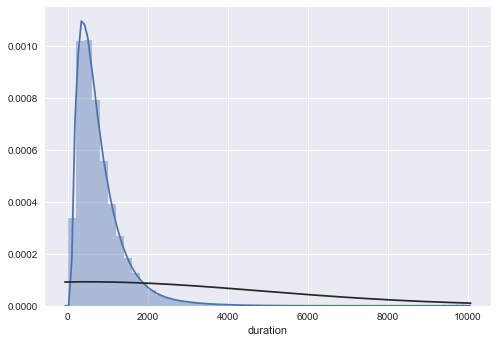

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
sns.distplot(df['duration'], kde=True, fit = stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

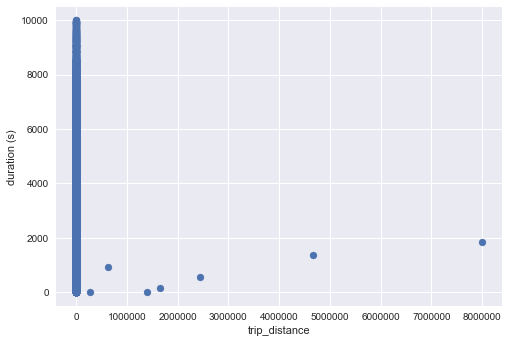

In [19]:
plt.scatter(df['trip_distance'],df['duration'])
plt.ylabel('duration (s)')
plt.xlabel('trip_distance') 
plt.show()

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [20]:
df['day_of_week'] = pickup.apply(lambda x: datetime.date.isoweekday(x))
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,2,7.5,0.5,0.5,0.0,0.00,0.3,8.80,0.0,5
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,1,18.0,0.5,0.5,0.0,0.00,0.3,19.30,0.0,5
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,1,33.0,0.5,0.5,0.0,0.00,0.3,34.30,0.0,5
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,2,16.5,0.0,0.5,0.0,0.00,0.3,17.30,0.0,5
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,2,8.0,0.0,0.5,0.0,0.00,0.3,8.80,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906851,2,2016-01-31 22:53:00,2016-01-31 22:59:37,1,1.68,-74.003578,40.750751,1,N,-74.002159,...,1,7.0,0.5,0.5,1.0,0.00,0.3,9.30,397.0,7
10906852,2,2016-01-31 23:00:11,2016-01-31 23:12:08,1,2.65,-74.002159,40.734852,1,N,-73.999680,...,1,11.0,0.5,0.5,1.0,0.00,0.3,13.30,717.0,7
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,...,2,8.5,0.5,0.5,0.0,0.00,0.3,9.80,466.0,7
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,...,2,2.5,0.5,0.5,0.0,0.00,0.3,3.80,11.0,2


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [22]:
df['time_of_day'] = pickup.apply(lambda x: x.hour)
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,time_of_day
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,0.5,0.5,0.0,0.00,0.3,8.80,0.0,5,0,0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,0.5,0.5,0.0,0.00,0.3,19.30,0.0,5,0,0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,0.5,0.5,0.0,0.00,0.3,34.30,0.0,5,0,0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,0.0,0.5,0.0,0.00,0.3,17.30,0.0,5,0,0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,0.0,0.5,0.0,0.00,0.3,8.80,0.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906851,2,2016-01-31 22:53:00,2016-01-31 22:59:37,1,1.68,-74.003578,40.750751,1,N,-74.002159,...,0.5,0.5,1.0,0.00,0.3,9.30,397.0,7,22,22
10906852,2,2016-01-31 23:00:11,2016-01-31 23:12:08,1,2.65,-74.002159,40.734852,1,N,-73.999680,...,0.5,0.5,1.0,0.00,0.3,13.30,717.0,7,23,23
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,...,0.5,0.5,0.0,0.00,0.3,9.80,466.0,7,23,23
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,...,0.5,0.5,0.0,0.00,0.3,3.80,11.0,2,0,0


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

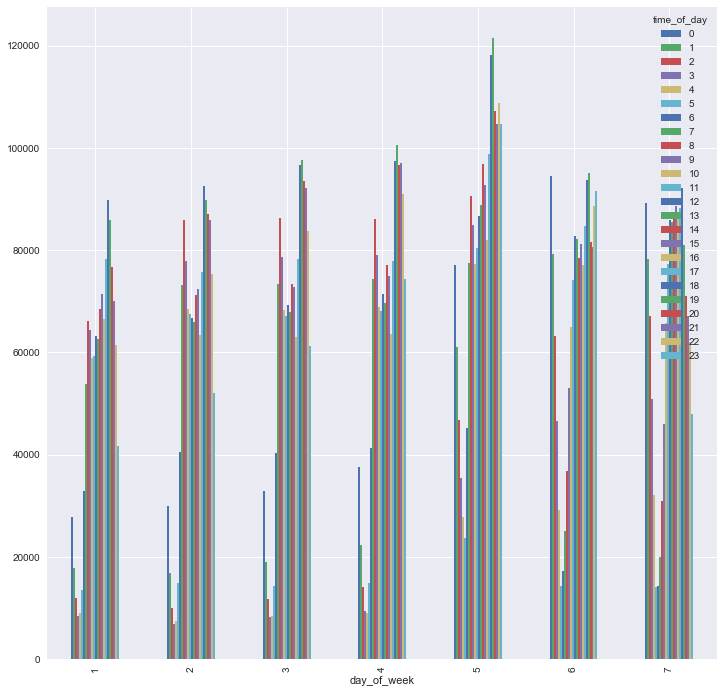

In [24]:
grouped = df.groupby(['day_of_week','time_of_day'])
grouped.size().unstack().plot(kind='bar',figsize=(12,12))

Differences Noted:

Friday evenings had significantly more trips than other times and days.

The pattern within each day from Monday to Thursday are very similar that more trips happened during the day than during the night.

But there were much more trips between midnight and early morning during the weekend.

<h2>Create zones</h2>

In [25]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    import numpy as np
    lat = np.linspace(southlimit,northlimit,zone_factor+1)
    long = np.linspace(westlimit,eastlimit,zone_factor+1)
    counter = 0
    
    for i in range(zone_factor):
        for j in range(zone_factor):
            zone_table.append(("%2d"%(counter),
                              [[lat[i],long[j]],
                              [lat[i],long[j+1]],
                              [lat[i+1],long[j]],
                              [lat[i+1],long[j+1]],
                              [lat[i],long[j]]
                              ]))
            counter+=1

    return zone_table

In [26]:
createZoneTable(20)

[(' 0',
  [[40.4856, -74.2635],
   [40.4856, -74.237955],
   [40.509299999999996, -74.2635],
   [40.509299999999996, -74.237955],
   [40.4856, -74.2635]]),
 (' 1',
  [[40.4856, -74.237955],
   [40.4856, -74.21240999999999],
   [40.509299999999996, -74.237955],
   [40.509299999999996, -74.21240999999999],
   [40.4856, -74.237955]]),
 (' 2',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.186865],
   [40.509299999999996, -74.21240999999999],
   [40.509299999999996, -74.186865],
   [40.4856, -74.21240999999999]]),
 (' 3',
  [[40.4856, -74.186865],
   [40.4856, -74.16131999999999],
   [40.509299999999996, -74.186865],
   [40.509299999999996, -74.16131999999999],
   [40.4856, -74.186865]]),
 (' 4',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.135775],
   [40.509299999999996, -74.16131999999999],
   [40.509299999999996, -74.135775],
   [40.4856, -74.16131999999999]]),
 (' 5',
  [[40.4856, -74.135775],
   [40.4856, -74.11023],
   [40.509299999999996, -74.135775],
   [40.5092999999999

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [52]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    #Your code goes here
    for i in zone_table:
        coordinates = list()
        coordinates.append(i[1])
        data_point = { "geometry": {"type": "Polygon", "coordinates": coordinates},
                      "properties": {"zone_id": i[0]}, "type":"Feature"}
        
        zone_data_dict_features.append(data_point)
    
    return zone_data_dict

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [27]:
zone_factor = 20
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_table

[(' 0',
  [[40.4856, -74.2635],
   [40.4856, -74.237955],
   [40.509299999999996, -74.2635],
   [40.509299999999996, -74.237955],
   [40.4856, -74.2635]]),
 (' 1',
  [[40.4856, -74.237955],
   [40.4856, -74.21240999999999],
   [40.509299999999996, -74.237955],
   [40.509299999999996, -74.21240999999999],
   [40.4856, -74.237955]]),
 (' 2',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.186865],
   [40.509299999999996, -74.21240999999999],
   [40.509299999999996, -74.186865],
   [40.4856, -74.21240999999999]]),
 (' 3',
  [[40.4856, -74.186865],
   [40.4856, -74.16131999999999],
   [40.509299999999996, -74.186865],
   [40.509299999999996, -74.16131999999999],
   [40.4856, -74.186865]]),
 (' 4',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.135775],
   [40.509299999999996, -74.16131999999999],
   [40.509299999999996, -74.135775],
   [40.4856, -74.16131999999999]]),
 (' 5',
  [[40.4856, -74.135775],
   [40.4856, -74.11023],
   [40.509299999999996, -74.135775],
   [40.5092999999999

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [28]:
def get_zone(lat,lon,zone_table):
    
    #Your code goes here
    zone = ''
    for i in zone_table:
        if lat>=i[1][0][0] and lat<=i[1][-2][0] and lon>=i[1][0][1] and lon<=i[1][-2][1]:
            zone = str(i[0])
    
    return zone



In [29]:
# Test using the example above:
get_zone(40.65,-74.19,zone_table)

# Result: 122 is correct as answered by TA in Piazza, since we are using 20 as zone_factor.
# If we used 10 as zone_factor, the function 'get_zone' will return 31.

'122'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [30]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [31]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude'],zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude'],zone_table),axis=1)
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,time_of_day,pickup_zone,dropoff_zone
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,0.0,0.00,0.3,8.80,0.0,5,0,0,210,211
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,0.0,0.00,0.3,19.30,0.0,5,0,0,211,192
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,0.0,0.00,0.3,34.30,0.0,5,0,0,170,252
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,0.0,0.00,0.3,17.30,0.0,5,0,0,190,151
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,0.0,0.00,0.3,8.80,0.0,5,0,0,251,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906851,2,2016-01-31 22:53:00,2016-01-31 22:59:37,1,1.68,-74.003578,40.750751,1,N,-74.002159,...,1.0,0.00,0.3,9.30,397.0,7,22,22,230,210
10906852,2,2016-01-31 23:00:11,2016-01-31 23:12:08,1,2.65,-74.002159,40.734852,1,N,-73.999680,...,1.0,0.00,0.3,13.30,717.0,7,23,23,210,230
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20,-74.003578,40.751011,1,N,-73.982651,...,0.0,0.00,0.3,9.80,466.0,7,23,23,230,230
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00,-73.945488,40.751530,1,N,-73.945457,...,0.0,0.00,0.3,3.80,11.0,2,0,0,232,232


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [32]:
# Percentage of total rides with same pickup zone and dropoff zone
count_same = len(df[df['pickup_zone']==df['dropoff_zone']])
total = len(df)
percentage = (count_same/total)*100
print("%1.2f%%"%percentage)

23.59%


In [36]:
# Zone with the highest pickups (Top 10 are shown below)
df.groupby('pickup_zone').size().sort_values(ascending=False)[:10]

pickup_zone
231    2275987
210    2206582
230    1768249
251    1068261
252     676884
190     476464
211     424159
189     328308
271     203435
138     192619
dtype: int64

The zone with the highest pickups is zone No.231

In [37]:
# Zone with the highest dropoffs (Top 10 are shown below)
df.groupby('dropoff_zone').size().sort_values(ascending=False)[:10]

dropoff_zone
231    2101812
210    1832917
230    1609618
251    1029274
252     730643
211     471871
190     448627
189     328575
271     228005
232     194295
dtype: int64

The zone with the highest dropoffs is zone No.231, too.

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [38]:
# Group by zones & hours
grouped_1 = df.groupby(['pickup_zone','time_of_day']).size().unstack()
grouped_1

time_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_zone,,,,,,,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
96,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
97,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


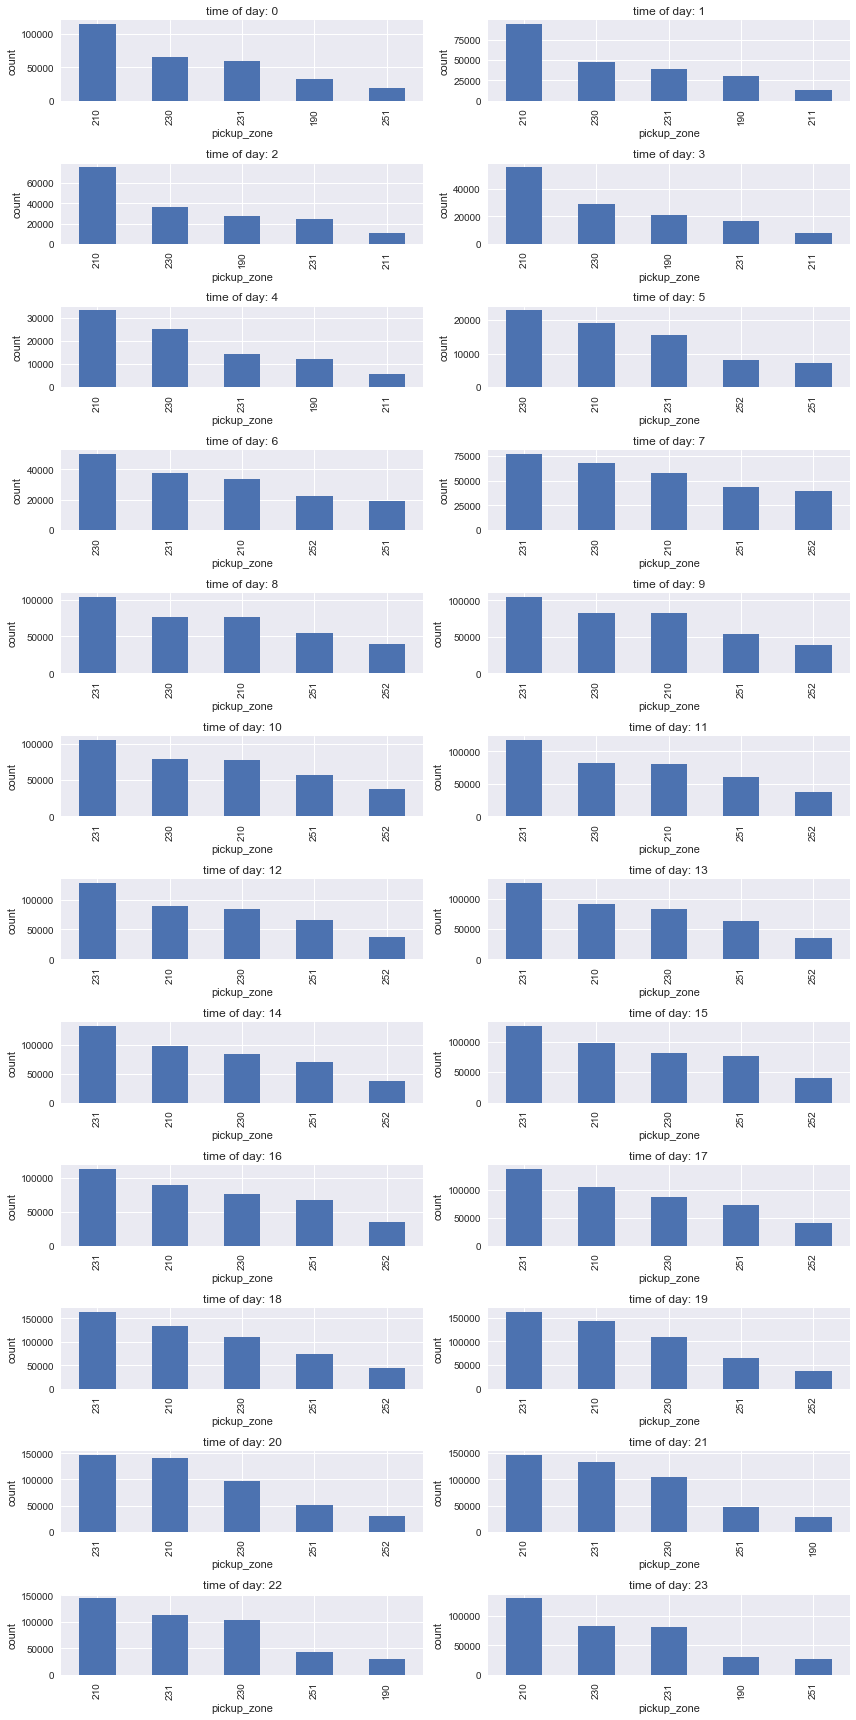

In [44]:
# Draw a figure of 24 plots
col_num_1 = 2
row_num_1 = 12
fig, axes = plt.subplots(row_num_1, col_num_1, figsize=(12,24))

for i,(time_of_day,zone_count) in enumerate(grouped_1.items()):
    ax = axes[int(i/col_num_1), i%col_num_1]
    zone_count = zone_count.sort_values(ascending=False)[:5]
    zone_count.plot(kind='bar',ax=ax)
    ax.set_title('time of day: '+str(time_of_day))
    ax.set_xlabel('pickup_zone')
    ax.set_ylabel('count') 

plt.tight_layout()

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [45]:
# Group by zones & weekdays
grouped_2=df.groupby(['pickup_zone','day_of_week']).size().unstack()
grouped_2

day_of_week,1,2,3,4,5,6,7
pickup_zone,,,,,,,
7,1.0,NaN,1.0,1.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1.0,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,1.0,NaN
100,NaN,1.0,1.0,NaN,NaN,1.0,NaN
103,NaN,1.0,NaN,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...
95,NaN,NaN,1.0,NaN,1.0,NaN,NaN
96,NaN,NaN,NaN,1.0,NaN,NaN,1.0
97,2.0,NaN,NaN,NaN,2.0,NaN,2.0


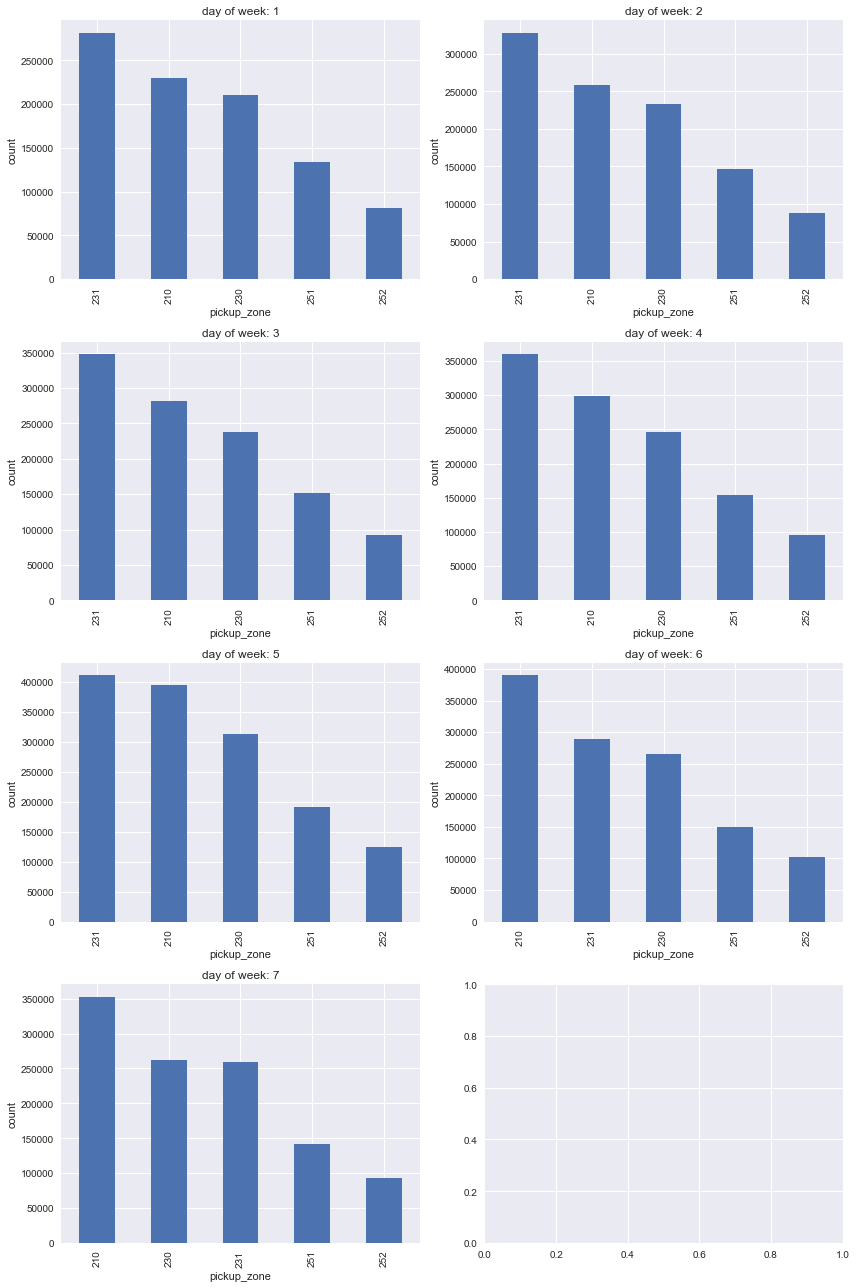

In [46]:
# Draw a figure of 7 plots
col_num_2=2
row_num_2=4
fig, axes = plt.subplots(row_num_2, col_num_2, figsize=(12,18))

for i,(day_of_week,zone_count) in enumerate(grouped_2.items()):
    ax=axes[int(i/col_num_2),i%col_num_2]
    zone_count=zone_count.sort_values(ascending=False)[:5]
    zone_count.plot(kind='bar',ax=ax)
    ax.set_title('day of week: '+str(day_of_week))
    ax.set_xlabel('pickup_zone')
    ax.set_ylabel('count')

plt.tight_layout()

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [48]:
weekdays = df[df['day_of_week']<6]
Morning = weekdays[weekdays['time_of_day']<=9]
MP = Morning[Morning['time_of_day']>=8]

pickup_grouped = MP.groupby(['pickup_zone', 'time_of_day'])
sizes = pd.DataFrame(pickup_grouped.size())

sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
sizes['pickup_zone'] = sizes['pickup_zone']
Most_Frequent = sizes.sort_values(by='size',ascending=False)[:10]
Most_Frequent

,pickup_zone,size
time_of_day,,
8,231,91800
9,231,86376
9,210,67343
8,210,66872
9,230,66267
8,230,64900
8,251,47884
9,251,42597
8,252,33435


The most frequent pickup zone between 8am to 9am on a weekday is still zone No.231

<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [62]:
import folium
# Create a geojson object calling the 'createGeoJsonObject' function above
GJB = createGeoJsonObject(zone_table)

In [63]:
dropoff_groups = df.groupby('dropoff_zone')
sizes_d = pd.DataFrame(dropoff_groups.size())
sizes_d.rename(columns={0:"size"},inplace=True)
sizes_d.reset_index(level=0, inplace=True)
sizes_d['dropoff_zone'] = sizes_d['dropoff_zone']

In [64]:
GJB = createGeoJsonObject(zone_table)
sizes_d2 = sizes_d
sizes_d2.reset_index(level=0, inplace=True)
sizes_d2.rename(columns={'dropoff_zone':'zone_id'}, inplace=True)

m = folium.Map(location = [40.7589,-73.9851],zoom_start=13)
m.choropleth(geo_data = gdf, 
             name = 'dropoff zone choropleth',
             data = sizes_d2,
             columns = ['zone_id','size'],
             key_on = 'feature.properties.zone_id',
             fill_color = 'RdYlGn', 
             fill_opacity=0.9, 
             line_opacity=1,
             legend_name = 'ride frequency size heatmap')
folium.LayerControl().add_to(m)

In [66]:
m